# Dealing with Categorical Variables - Lab

## Introduction
In this lab, you'll explore the Ames Housing dataset for categorical variables, and you'll transform your data so you'll be able to use categorical data as predictors!

## Objectives
You will be able to:
* Determine whether variables are categorical or continuous
* Use one hot encoding to create dummy variables
* Describe why dummy variables are necessary

## Importing the Ames Housing dataset

Let's start by importing the Ames Housing dataset from ``ames.csv`` into a pandas dataframe using pandas ``read_csv()``

In [74]:
# Import your data
import pandas as pd
import numpy as np


In [75]:
df = pd.read_csv("ames.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Now look at the first five rows of `ames`:  

In [76]:
# Inspect the first few rows
df.iloc[0]

Id                     1
MSSubClass            60
MSZoning              RL
LotFrontage           65
LotArea             8450
Street              Pave
Alley                NaN
LotShape             Reg
LandContour          Lvl
Utilities         AllPub
LotConfig         Inside
LandSlope            Gtl
Neighborhood     CollgCr
Condition1          Norm
Condition2          Norm
BldgType            1Fam
HouseStyle        2Story
OverallQual            7
OverallCond            5
YearBuilt           2003
YearRemodAdd        2003
RoofStyle          Gable
RoofMatl         CompShg
Exterior1st      VinylSd
Exterior2nd      VinylSd
MasVnrType       BrkFace
MasVnrArea           196
ExterQual             Gd
ExterCond             TA
Foundation         PConc
                  ...   
BedroomAbvGr           3
KitchenAbvGr           1
KitchenQual           Gd
TotRmsAbvGrd           8
Functional           Typ
Fireplaces             0
FireplaceQu          NaN
GarageType        Attchd
GarageYrBlt         2003


## Variable Descriptions
Look in ``data_description.txt`` for a full description of all variables.

A preview of some of the columns:

**LotArea**: Size of the lot in square feet

**MSZoning**: Identifies the general zoning classification of the sale.
		
       A	 Agriculture
       C	 Commercial
       FV	Floating Village Residential
       I	 Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

**OverallCond**: Rates the overall condition of the house

       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor

**KitchenQual**: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

**YrSold**: Year Sold (YYYY)

**SalePrice**: Sale price of the house in dollars

Let's inspect all features using `.describe()` and `.info()`

In [77]:
# Use .describe()
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [78]:
# Use .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Plot Categorical Variables

Now, pick 6 categorical variables and plot them against SalePrice with a bar graph for each variable. All 6 bar graphs should be on the same figure.

In [79]:
df.groupby('Neighborhood').mean()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Blmngtn,773.941176,114.117647,47.142857,3398.176471,7.176471,5.000000,2005.235294,2005.764706,45.588235,196.000000,...,147.294118,15.529412,0.000000,0.000000,8.470588,0.000000,0.000000,5.705882,2007.470588,194870.882353
Blueste,778.500000,160.000000,24.000000,1625.000000,6.000000,6.000000,1980.000000,1980.000000,0.000000,183.000000,...,155.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.500000,137500.000000
BrDale,719.187500,160.000000,21.562500,1801.000000,5.687500,5.437500,1971.437500,1973.625000,307.562500,250.437500,...,68.250000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.812500,2007.687500,104493.750000
BrkSide,734.724138,49.741379,57.509804,7360.413793,5.051724,6.137931,1931.431034,1968.586207,7.396552,195.741379,...,35.844828,25.344828,39.844828,2.482759,20.896552,0.000000,35.689655,6.206897,2007.672414,124834.051724
ClearCr,604.928571,52.500000,83.461538,30875.750000,5.892857,5.678571,1966.571429,1983.750000,84.571429,620.892857,...,188.821429,64.821429,32.535714,4.642857,34.928571,0.000000,32.142857,6.785714,2007.785714,212565.428571
CollgCr,726.840000,43.300000,71.682540,9619.146667,6.640000,5.240000,1997.886667,1999.140000,97.879195,456.586667,...,114.320000,51.720000,0.226667,2.593333,4.300000,0.000000,16.333333,6.140000,2007.806667,197965.773333
Crawfor,801.078431,58.235294,71.804878,11809.686275,6.274510,6.588235,1941.549020,1979.196078,82.740000,466.803922,...,52.568627,27.000000,46.176471,10.803922,30.176471,0.000000,49.019608,6.862745,2007.490196,210624.725490
Edwards,762.930000,56.800000,68.217391,10218.650000,5.080000,5.440000,1955.970000,1975.110000,50.470000,424.460000,...,70.770000,33.240000,26.380000,1.800000,15.250000,12.180000,16.000000,5.750000,2007.940000,128219.700000
Gilbert,749.151899,58.227848,79.877551,11379.151899,6.556962,5.126582,1998.253165,1998.822785,42.051282,214.025316,...,102.822785,42.632911,0.000000,10.974684,3.683544,0.000000,21.265823,6.594937,2007.556962,192854.506329


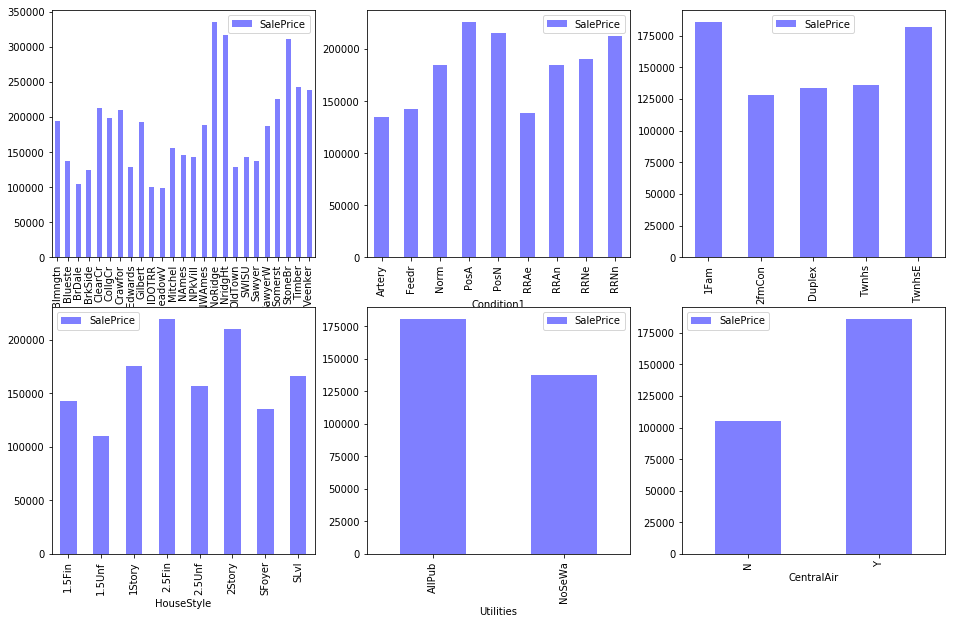

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline

# Create bar plots

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(16,10))

for xcol, ax in zip(['Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'Utilities', 'CentralAir'], axes.flatten()):
    df.groupby(xcol).mean().plot(kind='bar', y='SalePrice', ax=ax, alpha=0.5, color='b')

## Create dummy variables

Create dummy variables for the six categorical features you chose remembering to drop the first. Drop the categorical columns that you used, concat the dummy columns to our continuous variables and asign it to a new variable `ames_preprocessed`

In [81]:
# Create dummy variables for your six categorical features
dummies = ['Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'Utilities', 'CentralAir']


variable = pd.get_dummies(df[dummies], prefix=dummies, drop_first=True)
new = df.drop(dummies, axis=1)
df_processed = pd.concat([new, variable], axis=1)

df_processed.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Utilities_NoSeWa,CentralAir_Y
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,Inside,...,0,0,0,0,0,1,0,0,0,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,FR2,...,0,0,1,0,0,0,0,0,0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,Inside,...,0,0,0,0,0,1,0,0,0,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,Corner,...,0,0,0,0,0,1,0,0,0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,FR2,...,0,0,0,0,0,1,0,0,0,1


In [83]:
df_processed.iloc[0]

Id                            1
MSSubClass                   60
MSZoning                     RL
LotFrontage                  65
LotArea                    8450
Street                     Pave
Alley                       NaN
LotShape                    Reg
LandContour                 Lvl
LotConfig                Inside
LandSlope                   Gtl
Condition2                 Norm
OverallQual                   7
OverallCond                   5
YearBuilt                  2003
YearRemodAdd               2003
RoofStyle                 Gable
RoofMatl                CompShg
Exterior1st             VinylSd
Exterior2nd             VinylSd
MasVnrType              BrkFace
MasVnrArea                  196
ExterQual                    Gd
ExterCond                    TA
Foundation                PConc
BsmtQual                     Gd
BsmtCond                     TA
BsmtExposure                 No
BsmtFinType1                GLQ
BsmtFinSF1                  706
                         ...   
Neighbor

## Summary

In this lab, you practiced your knowledge of categorical variables on the Ames Housing dataset! Specifically, you practiced distinguishing continuous and categorical data. You then created dummy variables using one hot encoding.